# ENEL645 Project - Driver drowsiness detection, section 2
## Realtime testing using webcam
### Group 6


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import random
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## 3.0 Realtime detection test

In [3]:
new_model = tf.keras.models.load_model('DrowsinessDet_weights.h5') # Load model

# Test whether the eye is closed or open

As the value ranges from 0 to 1, we the eye is detected as closed, then  the value will be nearer to zero. 
And if the eye is detected as open then it will be near to 1.

In [7]:
img_size=224
img_array = cv2.imread('dataset/dev/open_eyes/s0037_08567_1_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [8]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3) #Load test image into array and resize

In [9]:
X_input.shape #shape of test image

(1, 224, 224, 3)

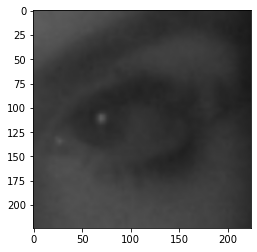

In [10]:
plt.imshow(new_array)

In [11]:
X_input = X_input/255.0

In [12]:
prediction = new_model.predict(X_input) #pass X_input to prediction

In [13]:
prediction #Very positive value prove open eyes, value tending to zero proves closed eyes

array([[0.9999999]], dtype=float32)

If the eye is closed, the prediction value will be closer to 0, i.e. 0.0000000008970.
If the eye is closed, the prediction value will be closer to 1 and above 1 , i.e. 1.00123

#Test on random face online

In [14]:
img = cv2.imread('dataset/test/000613.jpg')

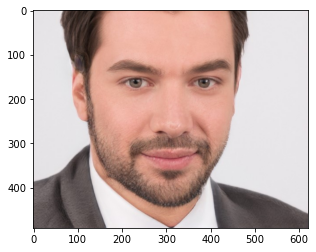

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')   #haarcascade_eye.xml'

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [19]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

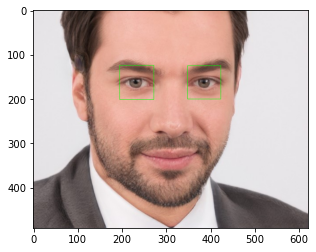

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [21]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

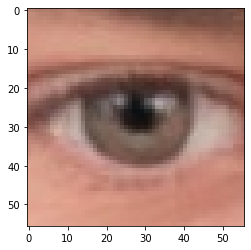

In [22]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [23]:
eyes_roi.shape

(56, 56, 3)

In [24]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [25]:
new_model.predict(final_img)

array([[0.9999897]], dtype=float32)

Since the eye is open, we got the prediction value as 1.

# Realtime Video Demo
## First Detect that eyes are closed on open

In [26]:
import cv2
path = 'open_cv/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
            
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0.1):
        status = "Open Eyes"
    else:
        status ="Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = (faceCascade.detectMultiScale(gray,1.1,4))

    #draw a rectangle around the faces


    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

      #use putText(method) for
    cv2.putText(frame,\
                  status,
                  (50, 50),\
                  font, 3,\
                  (0,0,225),\
                  2,\
                  cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
          break
      
cap.release()
cv2.destroyAllWindows()
    

#Press Crthl+C



eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
eyes are not detected
Fa

KeyboardInterrupt: 

# Realtime Video Demo

## If eyes are closed for unusal time, Alarm is generated

In [60]:
import winsound
frequency = 2500 #Set frequency to 2500 Hertz
duration = 1000 #Set Duration to 1000ms ==1second
import numpy as np
import cv2  #pip install opencv-python
##
##from deepface import Deepface ##pip install deepface
path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                 eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    
    #Draw a rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
    #use putText(method) for
    #Insert text on video
            
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0.1):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150,150)
                    ,font,3,
                    (0,255,0),
                     2,
                    cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)
    else:
        counter = counter + 1
        status ="Closed Eyes"
        cv2.putText(frame,
                  status,
                  (50, 50),
                  font, 3,
                  (0,0,225),
                  2,
                  cv2.LINE_4)
        cv2.rectangle(frame, (x , y), (x+w , y + h), (0,0,225), 2)
        if counter>5:
            
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, 'Sleep Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0,255),2)
            winsound.Beep(frequency, duration)
            counter=0

   
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
          break
      
cap.release()
cv2.destroyAllWindows()
    

#Press Crthl+C



ModuleNotFoundError: No module named 'winsound'